# Training Notebook

This notebook is used for training on data prepared using the data preparation notebook

In [7]:
%load_ext autoreload
%autoreload 2
%reload_ext tensorboard
%matplotlib inline
#%matplotlib qt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [8]:

# Training Notebook
# 
# This notebook is used for training on data prepared using the data preparation notebook

# This is a blanket include statement cell, some of these may not be used in this notebook specifically
import os
import sys
from datetime import datetime
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from collections import OrderedDict
import SimpleITK as sitk
#import logging
#logging.getLogger("tensorflow").setLevel(logging.ERROR)
from collections import OrderedDict
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets
from pathlib import Path

import torchmetrics

pkg_path = str(Path(os.path.abspath('')).parent.absolute())
sys.path.insert(0, pkg_path)
pkg_path = str('/home/ee577/project')
sys.path.insert(0, pkg_path)

from src import *

# Load config file
config = global_config.config

import data_prep as dp
from pytorch.run_model_torch import RunModel
from pytorch.dataset_class import DatasetGenerator

from MedicalNet.models import resnet

device = "cuda" if torch.cuda.is_available() else "cpu"
seed = 42
torch.cuda.manual_seed_all(seed)
print(f"using {device} device")


using cuda device


## Get data

In [9]:
##### Uncomment lines corresponding to desired modalities to run with
# csv_dir: directory to the csv files of the UPENN-GBM dataset
# image_dir: the location of the npy files for a specified modality
# modality: the modality group to be selected

csv_dir = '/home/ee577/project/Datasets/UPENN_GBM/radiomic_features_CaPTk/'
image_dir = '/home/ee577/project/Datasets/UPENN_GBM/PKG-UPENN-GBM-NIfTI/UPENN-GBM/NIfTI-files'

#####
#modality = 'DSC'
#modality = 'DTI'
modality = 'struct'
#####
classifier = 'Survival_from_surgery_days_UPDATED'

derivatives = {
    'struct': ['T2', 'FLAIR', 'T1', 'T1GD'],
    'DTI':  ['DTI_AD', 'DTI_FA', 'DTI_RD', 'DTI_TR'],
    'DSC':['DSC_ap-rCBV', 'DSC_PH', 'DSC_PSR'],
}

gen_params = {
              'data_dir': os.path.join(config.upenn_dir, 'numpy_conversion_struct_channels'),
              'csv_dir': os.path.join(config.upenn_dir),
              'modality': ['mods'],
              'dim': (70,86,86),
              'n_channels': 1,
              'n_classes': 7,
              'seed': seed,
              'to_augment': False,
              'make_augment': False,
              'to_encode': False,
              'to_slice': True,
              'to_3D_slice': False,
              'n_slices': 1,
              'use_clinical': False,
              'augment_types': None,
             }


# This function gives the list of patients that will be used in the training
patients = dp.retrieve_patients(csv_dir, image_dir, modality=derivatives[modality], classifier=classifier)

# Create the training/test splits for a specified modality
X_train, y_train, X_test, y_test = dp.split_image_v2(patients, seed=seed)

train_data = DatasetGenerator(X_train, y_train, **gen_params)
train_dataloader = DataLoader(train_data, batch_size=5, shuffle=True, pin_memory=True)

for batch, (X, y) in enumerate(train_dataloader):
    print("test")
    break


test


## Display data

In [10]:

print(X.shape)
print(y)


torch.Size([5, 1, 2, 86, 86])
tensor([[False, False, False, False, False, False,  True],
        [False, False, False, False, False, False,  True],
        [ True, False, False, False, False, False, False],
        [False, False, False,  True, False, False, False],
        [False, False, False, False, False,  True, False]])


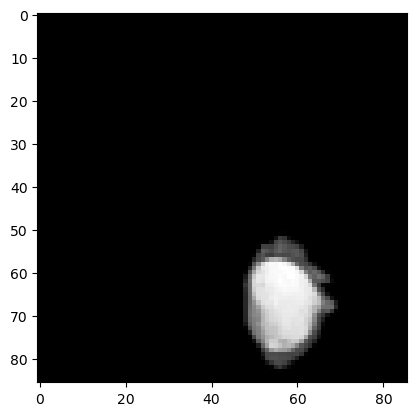

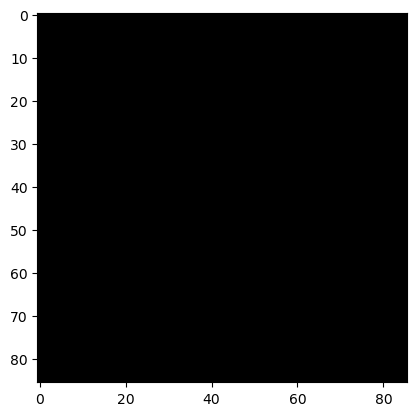

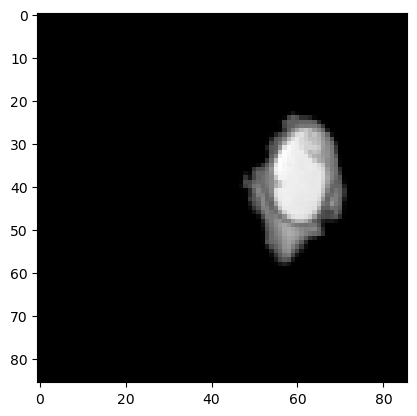

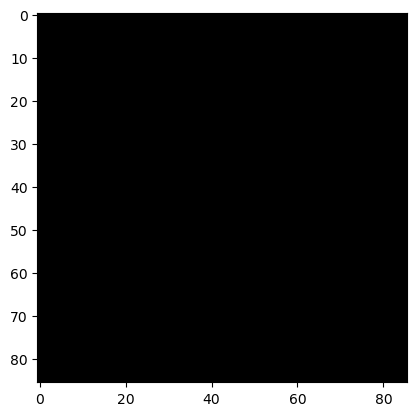

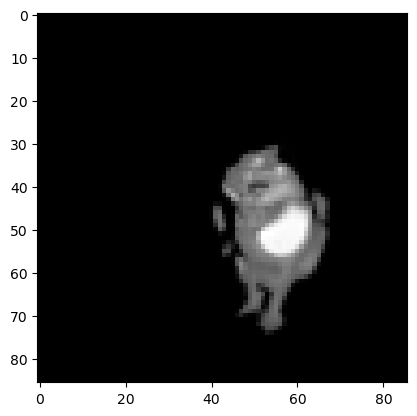

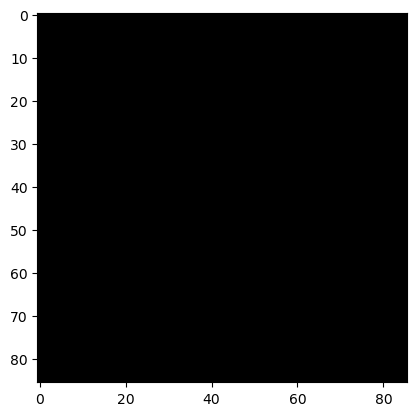

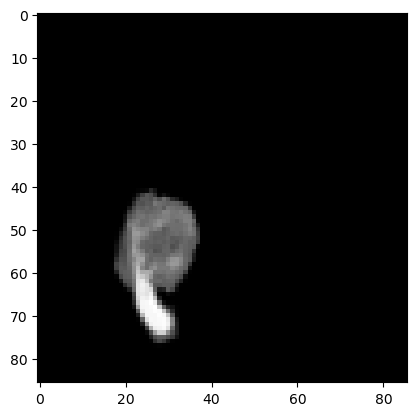

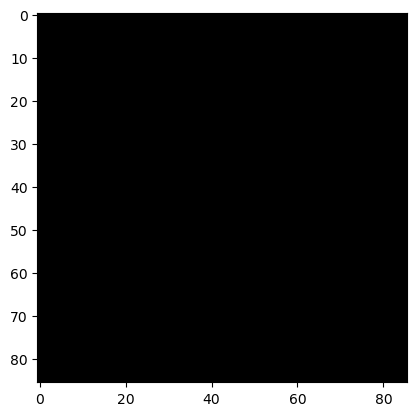

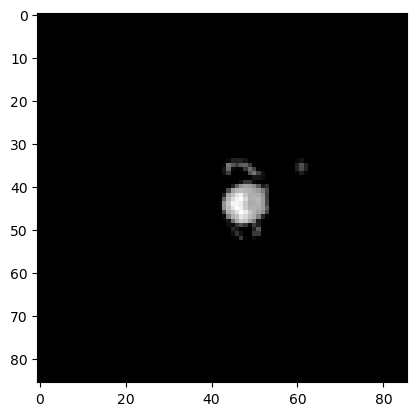

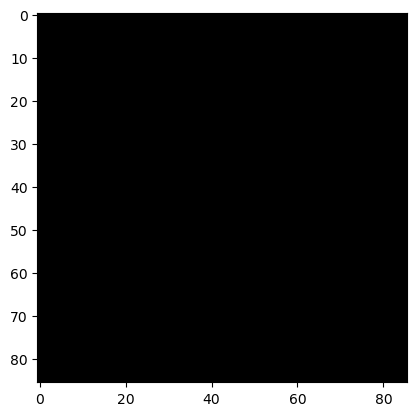

In [11]:

for i in range(X.shape[0]):
    for j in range(X.shape[2]):
        plt.imshow(X[i][0][j], cmap='gray')
        plt.show()
        plt.close()
